In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("D:\\STUDY\\Coding\\Jupyter Notebook\\LOAN DATA analysis\\DATA SET\\Loan 1.csv")

In [3]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908


In [4]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [5]:
df.shape

(20000, 23)

### checking for null values in each column


In [6]:
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property ID                       0
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [7]:
k=df["Gender"].mode()[0]
# Filling the most frequent value in the "Gender" column using the mode() function

In [8]:
df["Gender"].fillna(value=k,inplace=True)
# Filled missing values in the "Gender" column with the most frequent gender value

In [9]:
df.dropna(subset="Income (USD)",axis=0,inplace=True)
# Drop rows with missing values in the "Income (USD)" column

In [10]:
incomeV=["High" if i>=df["Income (USD)"].mode()[0] else "Low" for i in df["Income (USD)"]]
df["Income Stability"].fillna(value=pd.Series(incomeV), inplace=True)


#### Defined income stability categories based on income levels:
##### - If an individual's income is equal to or above the mode income, they are categorized as "High".
##### - Otherwise, they are categorized as "Low".
##### Filled missing values in the "Income Stability" column with the defined categories

In [11]:
null_check=df[df["Income Stability"].isnull()]

In [12]:
null_check

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
19252,C-9485,Cuc Cuccia,F,28,1901.25,NaN,Working,NaN,Semi-Urban,110739.11,...,3.0,815.22,0,Active,871,1901.25,3,Semi-Urban,1,195024.98
19269,C-16475,Solange Garraway,F,35,4178.39,NaN,Commercial associate,Managers,Semi-Urban,141265.45,...,2.0,829.56,1,Inactive,824,4178.39,1,Urban,1,240572.45
19287,C-16583,Flavia Kimes,F,65,1727.75,NaN,Pensioner,NaN,Semi-Urban,188954.89,...,3.0,799.26,0,Active,899,1727.75,1,Urban,0,238789.74
19319,C-13070,Trinidad Kolbe,F,53,2299.41,NaN,Working,High skill tech staff,Rural,18133.37,...,3.0,627.72,0,Active,654,2299.41,3,Rural,0,31932.32
19329,C-4506,Mariana Luera,F,46,5334.96,NaN,State servant,Core staff,Urban,104963.57,...,2.0,742.36,0,Active,135,5334.96,1,Semi-Urban,1,182283.42
19349,C-18124,Tandra Bethke,F,18,4015.01,NaN,Commercial associate,Medicine staff,Semi-Urban,97134.83,...,2.0,NaN,0,Unpossessed,830,4015.01,2,Urban,1,144049.08
19358,C-17185,Sybil May,M,54,4202.83,NaN,Working,Managers,Rural,81985.78,...,4.0,822.26,0,Unpossessed,716,4202.83,3,Semi-Urban,1,112976.76
19444,C-10639,Melinda Schuman,M,22,1727.09,NaN,Working,Laborers,Semi-Urban,52287.59,...,3.0,715.11,0,Inactive,138,1727.09,2,Rural,1,61920.11
19449,C-1674,Leslie Hoerr,M,19,2944.61,NaN,Commercial associate,Cleaning staff,Semi-Urban,165019.41,...,2.0,850.03,0,Inactive,68,2944.61,4,Rural,1,189443.68
19469,C-16342,Traci Bogart,M,18,1791.77,NaN,Working,Laborers,Semi-Urban,174310.80,...,3.0,719.79,0,Unpossessed,164,1791.77,1,Rural,1,301059.53



Checked for null values in the "Income Stability" column.
and we can see that we have some null values still left so we are going to drop those rows so that it dont affect later on

In [13]:
df.dropna(subset=["Income Stability"],axis=0,inplace=True)

#### Now we are going to fill Value of column "Type of Employment" 's null with 0 
As it  is providing a placeholder value that indicates the absence of any specific type of employment information for these records.


In [14]:
df["Type of Employment"].fillna(value=0,inplace=True)

#### Filling null values in the "Current Loan Expenses (USD)" column with the "ffill" method
Ensures that each missing value is replaced with the most recent non-null value preceding it in the dataset. This approach is chosen to maintain the continuity of the data, especially in cases where consecutive null values might represent a constant value rather than distinct missing entries.

In [15]:
df["Current Loan Expenses (USD)"].fillna(value="ffill",inplace=True)

#### Filling null values in the "Dependents" column with the rounded mean value 
Ensures that the missing values are replaced with a representative value based on the average number of dependents in the dataset. This approach helps to maintain the overall distribution of the data and prevents introducing bias by using a single imputed value for all missing entries.

In [16]:
df["Dependents"].fillna(value=round(df["Dependents"].mean()),inplace=True)

#### Filling null values in the "Credit Score" column with the mean value 
Helps to impute missing data points while preserving the overall distribution and central tendency of credit scores in the dataset. This approach ensures that the imputed values are representative of the typical credit score in the dataset, reducing the impact of missing data on subsequent analyses.

In [17]:
df["Credit Score"].fillna(value=df["Credit Score"].mean(),inplace=True)

#### Filling null values in the "Has Active Credit Card" column with the mode value 
Helps to replace missing data points with the most frequent category observed in the dataset. This approach ensures that the imputed values align with the prevailing trend in the dataset, providing a reasonable estimate for the missing values based on the existing distribution of active credit card status.

In [18]:

df['Has Active Credit Card'].fillna(value=df['Has Active Credit Card'].mode()[0], inplace=True)



#### Filling null values in the "Property Age" column with the median value 
Helps to mitigate the impact of outliers and skewed distributions, providing a robust estimate for missing values that is less sensitive to extreme values compared to using the mean.

#### For the "Property Location" column, filling null values with the mode (most frequent value) 
Helps to replace missing data points with the category that occurs most frequently in the dataset. This ensures that the imputed values align with the prevailing trend in the dataset, providing a reasonable estimate for the missing values based on the existing distribution of property locations.

In [19]:

df['Property Age'].fillna(value=df['Property Age'].median(), inplace=True)

df['Property Location'].fillna(value=df['Property Location'].mode()[0], inplace=True)


In [20]:
df.isnull().sum()#final check to ensure no null vlaues are left

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

# EDA

In [21]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [22]:
fig=plt.figure(figsize=(16, 10))#setting a figure size of graphs

<Figure size 1600x1000 with 0 Axes>

C:\Users\manis\AppData\Local\Temp\ipykernel_18880\4259167148.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income (USD)"])


<Axes: xlabel='Income (USD)', ylabel='Density'>

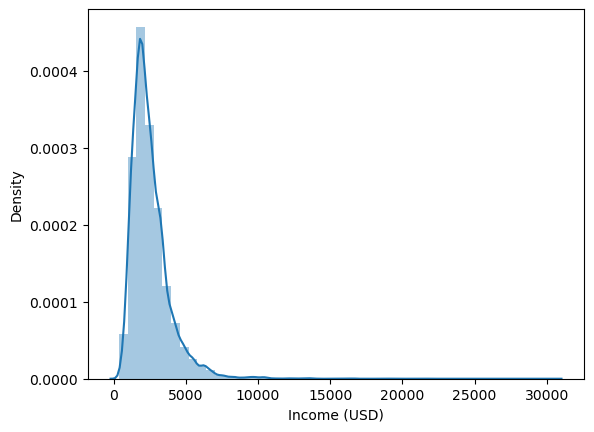

In [23]:
sns.distplot(df["Income (USD)"])

Clearly see that the graph here is skwed which means we can use z score method to remove outliers..We are going to do it using IOR METHOD 

In [24]:
df["Income (USD)"].describe()

count    19220.000000
mean      2536.637084
std       1415.570359
min        368.590000
25%       1659.382500
50%       2224.590000
75%       3082.887500
max      30427.680000
Name: Income (USD), dtype: float64

In [55]:
per25=1659.38# Define the 25th and 75th percentiles
per75=3082.89
ior=per75-per25# Calculate the interquartile range (IQR)

In [56]:
ul=per75+1.5*ior
ll=per25-1.5*ior

#### Calculated upper and lower limits using the interquartile range (IQR) for outlier detection.

In [27]:
df.shape

(19220, 23)

In [57]:
df[round(df["Income (USD)"])>ul]#Filtering out rows where the rounded income value exceeds the upper limit.

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Property Price (log)


In [29]:
#df = df[(df["Income (USD)"] <= ul) & (df["Income (USD)"] >= ll)]
#used in case of trimming values


we are going to use capping method and held the outlier to the border value

In [59]:
df["Income (USD)"]=np.where(
    df["Income (USD)"]>ul,ul
    ,np.where(df["Income (USD)"]<ll,ll,df["Income (USD)"]))

#Replaces values in the "Income (USD)" column with the upper limit if the original value exceeds the upper limit, the lower limit if the original value is less than the lower limit, or keeps the original value otherwise.

C:\Users\manis\AppData\Local\Temp\ipykernel_18880\229653782.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income (USD)"]) #used for checking whether it still have outliers


<Axes: xlabel='Income (USD)', ylabel='Density'>

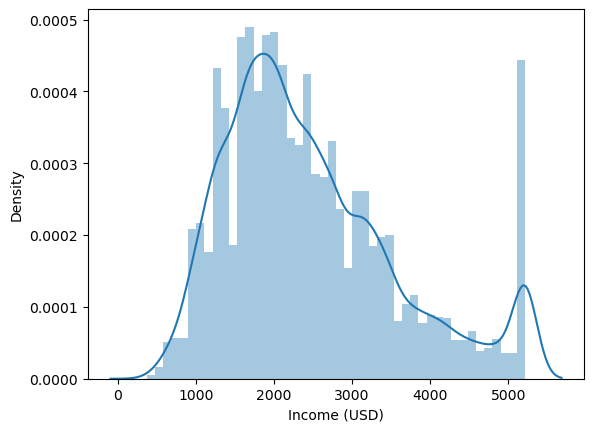

In [60]:
sns.distplot(df["Income (USD)"]) #used for checking whether it still have outliers

#### We have remove the outliers and can see the increase in the upper limit area due to capping

<Axes: xlabel='Income (USD)'>

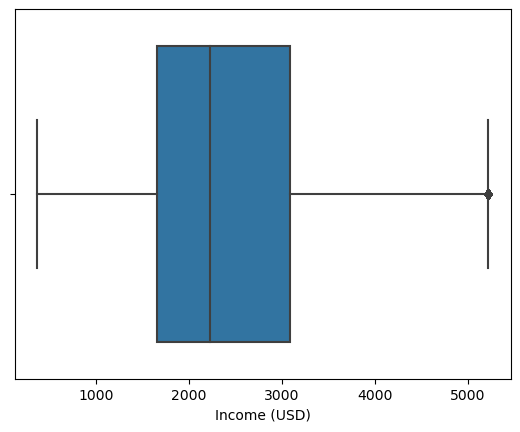

In [32]:
#we have succesfully removed the outliers
sns.boxplot(x="Income (USD)",data=df)

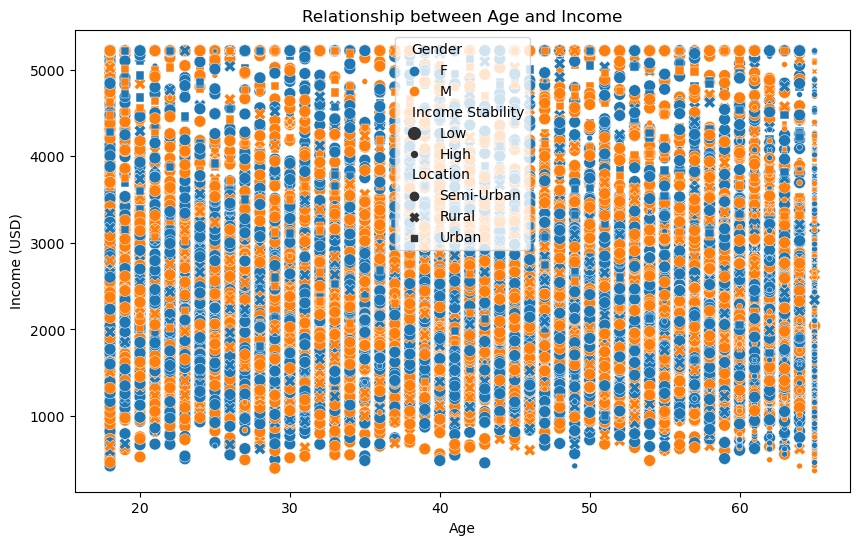

In [53]:
fig
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(data=df, x='Age', y='Income (USD)',hue="Gender",style=df["Location"],size=df["Income Stability"])

# Adding title and labels
plt.title('Relationship between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income (USD)')

# Show plot
plt.show()

## From the Above Graph analysis we get,


1. **Income Stability Distribution**: The majority of individuals exhibit low income stability, while a smaller proportion demonstrate high income stability.

2. **Property Location Distribution**: The dataset is predominantly composed of individuals residing in Semi-Urban areas, followed by Rural areas, with Urban areas having the least representation.

3. **Gender Distribution**: There is an approximately equal distribution of males and females across the dataset.

4. **Income Distribution Across Age Groups**: Income distribution is observed to be relatively uniform across age groups, with notable peaks below 20 years of age and above 60 years of age. Additionally, the income remains consistently below 3.5k across most age groups.


<Axes: xlabel='Income Stability', ylabel='Credit Score'>

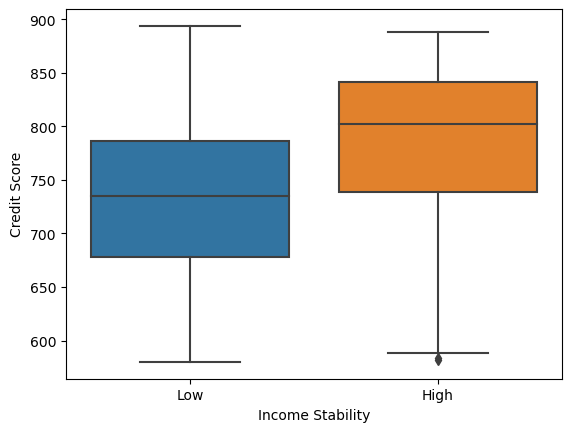

In [34]:
fig
sns.boxplot(x='Income Stability', y='Credit Score',data=df)

## This analysis provides insights into the relationship between credit score and income stability:

1. **Credit Score Analysis by Income Stability**: For individuals with low income stability, the majority have credit scores ranging from 675 to 740. The median credit score for this group is approximately 740, and 75% of the individuals have credit scores up to 740. In contrast, for those with high income stability, the majority have credit scores ranging from 750 to 840. The median credit score for this group is around 810, and 75% of the individuals have credit scores up to 840.

C:\Users\manis\AppData\Local\Temp\ipykernel_18880\3373726890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Credit Score"])


<Axes: xlabel='Credit Score', ylabel='Density'>

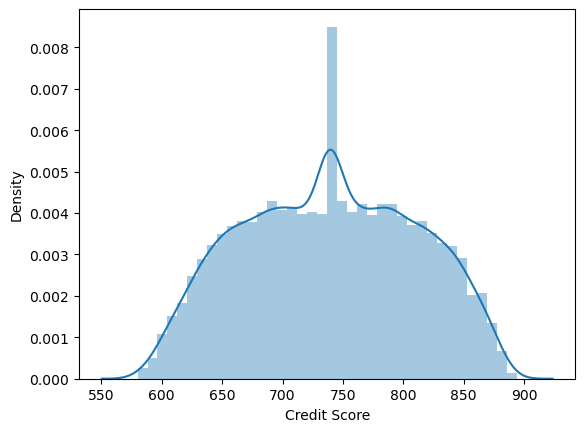

In [35]:
sns.distplot(df["Credit Score"])

## Analysis of Credit Score Distribution by Income Stability

This analysis provides insights into the distribution of credit scores among individuals based on their income stability:

- **Credit Score Ranges**: The credit scores observed in the dataset range from 550 to 900.

- **Central Tendency**: The majority of individuals fall within the middle range of credit scores, with the peak around 750 (approximately).


In [36]:
df['Credit Score'].skew()

-0.013199885306055306

#### its aprrox to 0 and can be held for no outliers

### we can use z score method to remove the outliers if we have as it is skewed

In [37]:
ll=df["Credit Score"].mean()-3*df["Credit Score"].std()
ul=df["Credit Score"].mean()+3*df["Credit Score"].std()

In [38]:
df[(df["Credit Score"]>ul) | (df["Credit Score"]<ll)]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price


### Thus we can see we dont have any outliers here 

C:\Users\manis\AppData\Local\Temp\ipykernel_18880\487030202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Loan Amount Request (USD)"])


<Axes: xlabel='Loan Amount Request (USD)', ylabel='Density'>

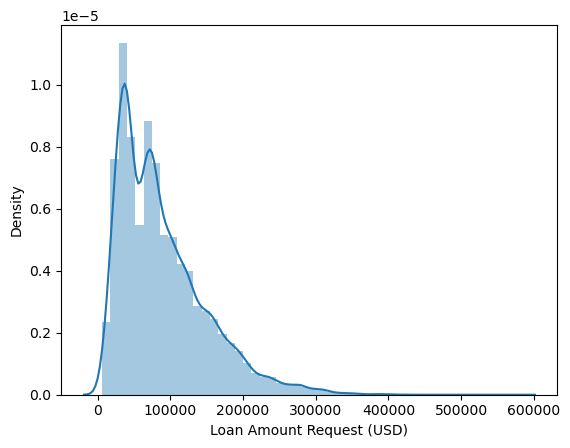

In [39]:
sns.distplot(df["Loan Amount Request (USD)"])

we can clearly see that it have outliers towards the right side let remove it using ior mehtod.

In [61]:
per25=df["Loan Amount Request (USD)"].quantile(0.25)#25 percentile
per75=df["Loan Amount Request (USD)"].quantile(0.75)#75 percentile
ior=per75-per25 #made ior using variables per75 and per25
ul=per75+1.5*ior#found upper limit
ll=per25-1.5*ior#found lower limit

#### Below this we can see the outlier of loam amount requested

In [41]:
df[(df["Loan Amount Request (USD)"]>ul) | (df["Loan Amount Request (USD)"]<ll)] 

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
15,C-1281,Trinidad Quam,F,60,5218.155,High,Pensioner,0,Urban,251463.83,...,1.0,851.87,0,Active,686,5591.39,1,Semi-Urban,0,438663.7
24,C-24580,Loriann Gagliano,M,49,5218.155,Low,Commercial associate,Managers,Urban,268769.89,...,3.0,711.90,0,Active,222,5787.21,1,Rural,1,441878.03
79,C-20883,Vinnie Books,M,25,5218.155,Low,Commercial associate,Managers,Urban,254490.58,...,3.0,775.96,1,Active,83,5552.08,3,Rural,1,324194.49
198,C-1907,Lorie Corum,M,47,3015.160,Low,Commercial associate,Accountants,Urban,241170.32,...,2.0,814.41,0,Active,176,3015.16,3,Rural,1,287488.95
202,C-48652,Horacio Gagliano,F,38,5218.155,Low,Working,Managers,Semi-Urban,390434.09,...,2.0,710.09,1,Inactive,940,5621.77,2,Rural,1,580055.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19856,C-25876,Araceli Saraiva,M,18,1902.680,Low,Working,Sales staff,Semi-Urban,249213.98,...,3.0,706.54,0,Unpossessed,599,1902.68,1,Rural,1,302131.19
19862,C-25914,Wiley Gagliano,F,18,4075.570,Low,Commercial associate,0,Semi-Urban,276091.16,...,2.0,844.69,0,Inactive,843,4075.57,2,Urban,1,481256.14
19872,C-35637,Sol Tierney,F,18,3338.960,Low,Commercial associate,Core staff,Rural,239884.83,...,4.0,741.76,1,Active,631,3338.96,3,Semi-Urban,1,395656.84
19909,C-38251,Migdalia Kirkham,F,62,3141.240,High,Pensioner,0,Semi-Urban,281270.51,...,2.0,841.08,0,Active,554,3141.24,1,Rural,0,419773.03


we are going to do capping of the outliers

In [63]:
df["Loan Amount Request (USD)"]=np.where(
    df["Loan Amount Request (USD)"]>ul,
    ul,
    np.where(
        df["Loan Amount Request (USD)"]<ll,
        ll,
        df["Loan Amount Request (USD)"]
    )
)

This code snippet uses nested `np.where` functions to perform a conditional replacement on the "Loan Amount Request (USD)" column in the DataFrame `df`. Here's how it works:

1. The outer `np.where` function checks if the loan amount is greater than the upper limit (`ul`). If it is, it replaces those values with the upper limit (`ul`).
2. If the condition in step 1 is not met, the inner `np.where` function is executed. It checks if the loan amount is less than the lower limit (`ll`). If it is, it replaces those values with the lower limit (`ll`).
3. If neither of the conditions in steps 1 and 2 are met, it means the loan amount is within the desired range, so it keeps the original loan amount unchanged.


C:\Users\manis\AppData\Local\Temp\ipykernel_18880\487030202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Loan Amount Request (USD)"])


<Axes: xlabel='Loan Amount Request (USD)', ylabel='Density'>

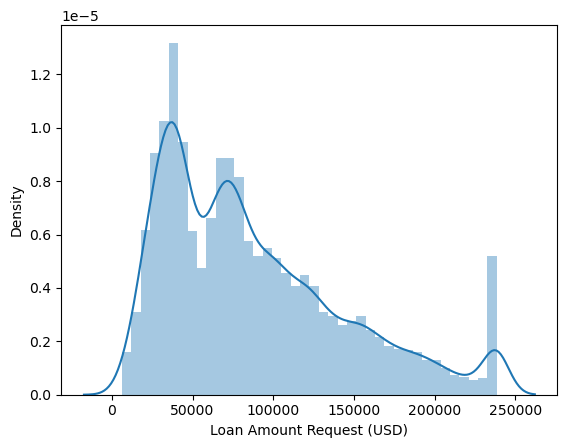

In [43]:
sns.distplot(df["Loan Amount Request (USD)"])

## From the above graph analysis, we observe the following points:

- The loan amount requested ranges from 0 to 250k.
- There is a peak around 45k, indicating that the most commonly requested loan amount is approximately 45k.
- The frequency gradually decreases until around 230k.
- However, there is a peak around 240k, which could be due to the capping of outliers.


In [75]:

df['Co-Applicant'].unique()

array(['1', '0', 0], dtype=object)

In [85]:
# Replace '?' with 0

df['Co-Applicant'] = df['Co-Applicant'].replace('?', 0)
df['Co-Applicant']=df['Co-Applicant'].astype(int)# data type set as int

In [83]:

df['Co-Applicant'].unique()

array([1, 0])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '13.0')])

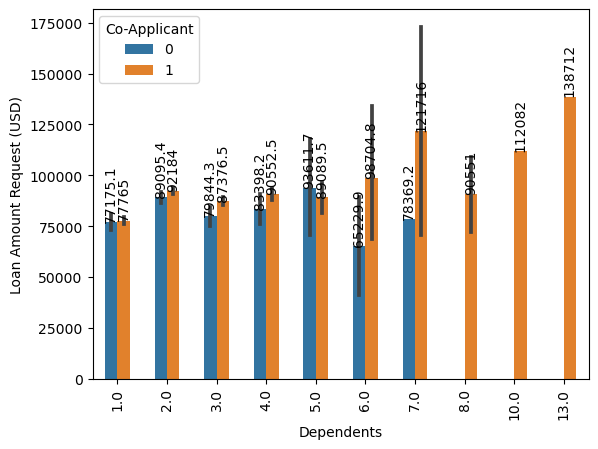

In [84]:

k=sns.barplot(y="Loan Amount Request (USD)",x="Dependents",data=df,width=0.5,hue="Co-Applicant")
for i in k.containers:
    k.bar_label(i,rotation=90)
    
plt.xticks(rotation=90)


### We observe the following patterns in loan requests based on the number of dependents:

- For individuals with 1 dependent:
  - The loan request is approximately 77k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 77k USD for each applicant with 0 co-applicants.

- For individuals with 2 dependents:
  - The loan request is approximately 90k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 90k USD for each applicant with 0 co-applicants.

- For individuals with 3 dependents:
  - The loan request is approximately 84k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 84k USD for each applicant with 0 co-applicants.

- For individuals with 4 dependents:
  - The loan request is approximately 90k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 83k USD for each applicant with 0 co-applicants.

- For individuals with 5 dependents:
  - The loan request is approximately 89k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 94k USD for each applicant with 0 co-applicants.

- For individuals with 6 dependents:
  - The loan request is approximately 99k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 65k USD for each applicant with 0 co-applicants.

- For individuals with 7 dependents:
  - The loan request is approximately 122k USD for each applicant with 1 co-applicant.
  - The loan request is approximately 78k USD for each applicant with 0 co-applicants.

- For individuals with 8 dependents:
  - The loan request is approximately 91k USD for each applicant with 1 co-applicant.

- For individuals with 10 dependents:
  - The loan request is approximately 112k USD for each applicant with 1 co-applicant.

- For individuals with 13 dependents:
  - The loan request is approximately 139k USD for each applicant with 1 co-applicant.


Text(0, 0.5, 'Frequency')

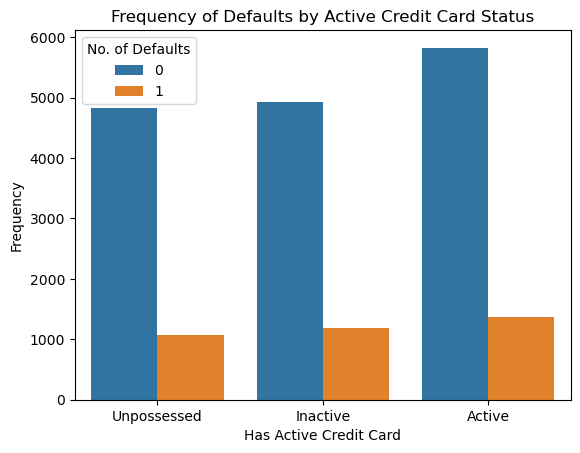

In [45]:
sns.countplot(x="Has Active Credit Card", hue="No. of Defaults", data=df)
plt.title("Frequency of Defaults by Active Credit Card Status")
plt.xlabel("Has Active Credit Card")
plt.ylabel("Frequency")

### In the analysis of the number of active credit cards and defaults, we observe the following:

- For individuals with 0 defaults:
  - Approximately 49k individuals do not possess any active credit cards.
  - Approximately 49k individuals have inactive credit cards.
  - Approximately 59k individuals are active credit card users.

- For individuals with 1 default:
  - Approximately 10k individuals do not possess any active credit cards.
  - Approximately 10k individuals have inactive credit cards.
  - Approximately 11k individuals are active credit card users.


In [86]:
df["Property Price"].dtype

dtype('float64')

In [87]:
df = df[df["Property Price"] != "?"]
# removed the rows with propert price ?.

In [48]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [49]:
df["Property Price"] = df["Property Price"].astype(float)


Text(0, 0.5, 'Property Price (USD)')

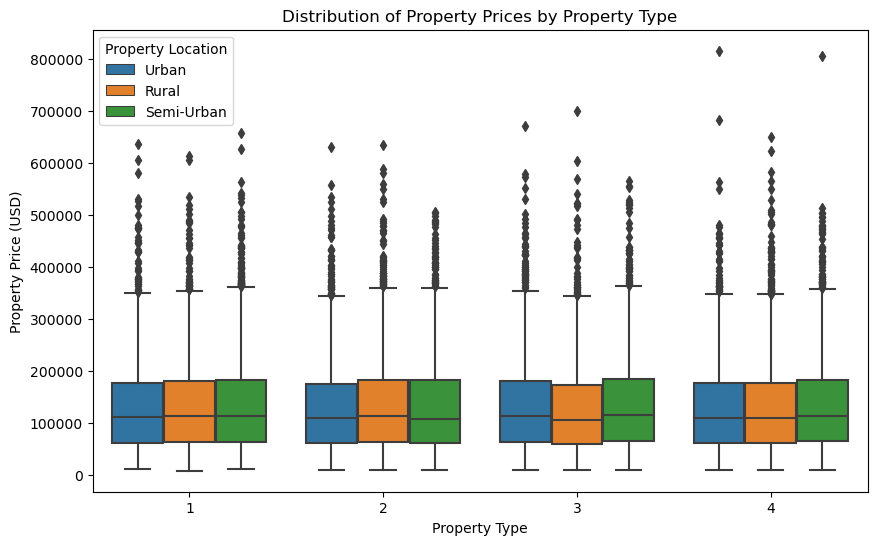

In [90]:
plt.figure(figsize=(10, 6))
df['Property Price (log)'] = np.log(df['Property Price'])
k=sns.boxplot(x="Property Type", y="Property Price",hue="Property Location", data=df)
for i in k.containers:
    k.bar_label(i,rotation=90)

plt.title("Distribution of Property Prices by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Property Price (USD)")


###### we can clearly see we have outliers so we are going to remove them

C:\Users\manis\AppData\Local\Temp\ipykernel_18880\259335577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Property Price"])


<Axes: xlabel='Property Price', ylabel='Density'>

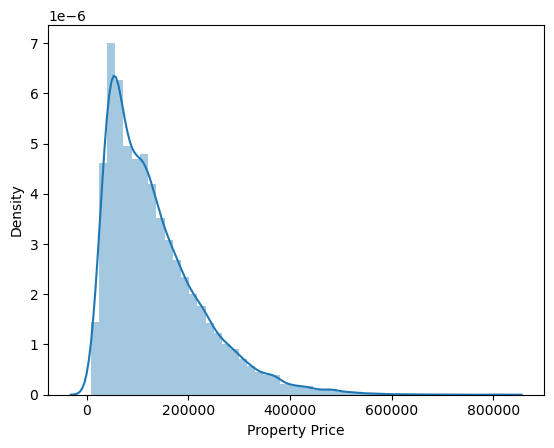

In [51]:
sns.distplot(df["Property Price"])

### we know that the graph isn't skewed so we are going to remove outliers using ior method

In [91]:
per25 = df["Property Price"].quantile(0.25)# Calculated the 25th percentile of the property price
per75 = df["Property Price"].quantile(0.75)# Calculated the 75th percentile of the property price
ior = per75 - per25# Determined the interquartile range
ul = per75 + 1.5 * ior# Determined the upper limit
ll = per25 - 1.5 * ior# Determined the lower limit


In [92]:
#lets get outliers present here
df[(df["Property Price"]>ul)|(df["Property Price"]<ll)]

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Property Price (log)
15,C-1281,Trinidad Quam,F,60,5218.155,High,Pensioner,0,Urban,238585.33375,...,851.87,0,Active,686,5591.39,1,Semi-Urban,0,438663.70,12.991488
24,C-24580,Loriann Gagliano,M,49,5218.155,Low,Commercial associate,Managers,Urban,238585.33375,...,711.90,0,Active,222,5787.21,1,Rural,1,441878.03,12.998789
202,C-48652,Horacio Gagliano,F,38,5218.155,Low,Working,Managers,Semi-Urban,238585.33375,...,710.09,1,Inactive,940,5621.77,2,Rural,1,580055.32,13.270879
308,C-46369,Janelle Kapoor,F,50,1885.980,Low,Working,0,Semi-Urban,238585.33375,...,801.00,0,Inactive,132,1885.98,1,Semi-Urban,1,435834.59,12.985018
347,C-27426,Carmina Burkley,F,50,1879.200,Low,Working,Laborers,Urban,208873.74000,...,711.44,0,Unpossessed,617,1879.20,4,Semi-Urban,1,371657.89,12.825729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19862,C-25914,Wiley Gagliano,F,18,4075.570,Low,Commercial associate,0,Semi-Urban,238585.33375,...,844.69,0,Inactive,843,4075.57,2,Urban,1,481256.14,13.084155
19872,C-35637,Sol Tierney,F,18,3338.960,Low,Commercial associate,Core staff,Rural,238585.33375,...,741.76,1,Active,631,3338.96,3,Semi-Urban,1,395656.84,12.888303
19909,C-38251,Migdalia Kirkham,F,62,3141.240,High,Pensioner,0,Semi-Urban,238585.33375,...,841.08,0,Active,554,3141.24,1,Rural,0,419773.03,12.947469
19911,C-22514,Aracely Hodson,M,61,1062.000,Low,Working,Secretaries,Semi-Urban,226822.66000,...,785.91,0,Inactive,506,1062.00,4,Urban,1,411190.22,12.926811


we are going to remove the outlier using capping method 

In [94]:
df["Property Price"]=np.where(df["Property Price"]>ul,ul,np.where(df["Property Price"]<ll,ll,df["Property Price"]))

1. **Calculate Percentiles**: Compute the 25th (`per25`) and 75th (`per75`) percentiles of the "Property Price" column to establish the interquartile range (`ior`).

2. **Calculate Upper and Lower Limits**: Determine the upper limit (`ul`) and lower limit (`ll`) for outlier detection based on the interquartile range.

3. **Outlier Detection**: Use numpy.where to identify and replace outliers in the `"Property Price"` column. Values exceeding the upper limit are replaced with `ul`, values below the lower limit are replaced with `ll`, and values within the range remain unchanged.


C:\Users\manis\AppData\Local\Temp\ipykernel_18880\259335577.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Property Price"])


<Axes: xlabel='Property Price', ylabel='Density'>

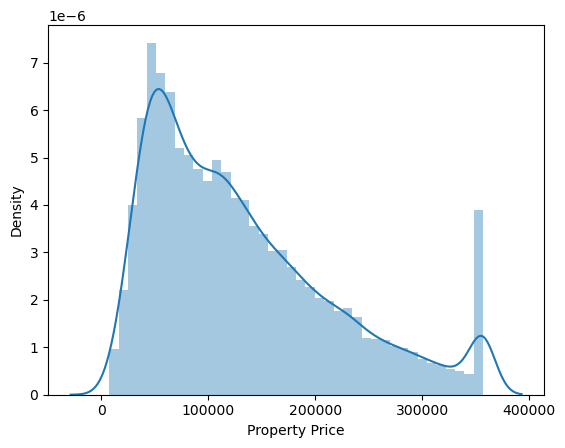

In [95]:
sns.distplot(df["Property Price"])

we have removed the outliers due to capiing the graph near 36k heighjt has increased.

Text(0, 0.5, 'Property Price (USD)')

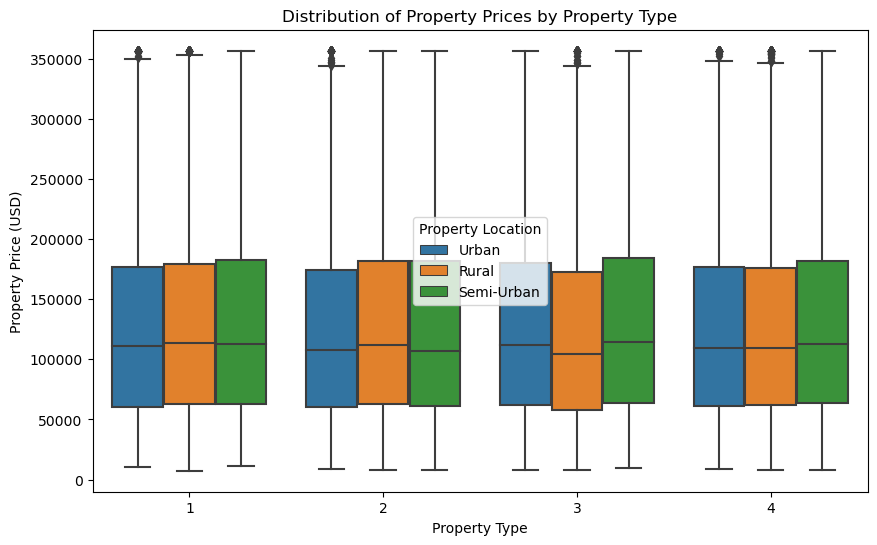

In [96]:
plt.figure(figsize=(10, 6))
df['Property Price (log)'] = np.log(df['Property Price'])
k=sns.boxplot(x="Property Type", y="Property Price",hue="Property Location", data=df)
for i in k.containers:
    k.bar_label(i,rotation=90)

plt.title("Distribution of Property Prices by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Property Price (USD)")


### After analyzing the graph, we found that:

1. For property type 1:
   - Those living in urban areas have a property price of approximately 170k USD.
   - Those living in rural areas have a property price of approximately 175k USD.
   - Those living in semi-urban areas have a property price of approximately 180k USD.

2. For property type 2:
   - Those living in urban areas have a property price of approximately 165k USD.
   - Those living in rural areas have a property price of approximately 177k USD.
   - Those living in semi-urban areas have a property price of approximately 177k USD.

3. For property type 3:
   - Those living in urban areas have a property price of approximately 175k USD.
   - Those living in rural areas have a property price of approximately 165k USD.
   - Those living in semi-urban areas have a property price of approximately 180k USD.

4. For property type 4:
   - Those living in urban areas have a property price of approximately 170k USD.
   - Those living in rural areas have a property price of approximately 170k USD.
   - Those living in semi-urban areas have a property price of approximately 180k USD.


Text(0, 0.5, 'Loan Amount Requested (USD)')

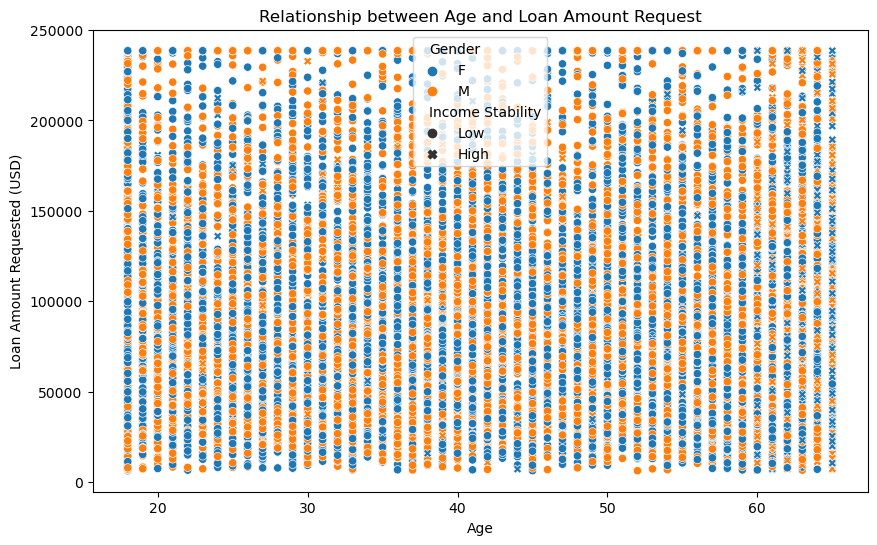

In [97]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Age", y=df["Loan Amount Request (USD)"],hue="Gender",style="Income Stability",data=df)

plt.title("Relationship between Age and Loan Amount Request")
plt.xlabel("Age")
plt.ylabel("Loan Amount Requested (USD)")



## From the above graph analysis, we observe the following:

1. **Income Stability Distribution:** The majority of individuals exhibit low income stability, while a smaller proportion demonstrate high income stability.

2. **Gender Distribution:** There is an approximately equal distribution of males and females across the dataset.

3. **Loan Amount Requested Across Age Groups:** Loan amount requested shows a relatively uniform distribution across age groups, with notable peaks below 20 years of age and above 60 years of age. Additionally, the loan amount requested remains consistently below 3.5k across most age groups.


In [98]:
df.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Property Price (log)'],
      dtype='object')

In [99]:
'''sns.pairplot(x="Income (USD)", y="Current Loan Expenses (USD)", data=df, kind="hex")

# Add labels and title
plt.xlabel("Income (USD)")
plt.ylabel("Current Loan Expenses (USD)")
plt.suptitle("Hexbin Plot of Income and Current Loan Expenses")'''

'sns.pairplot(x="Income (USD)", y="Current Loan Expenses (USD)", data=df, kind="hex")\n\n# Add labels and title\nplt.xlabel("Income (USD)")\nplt.ylabel("Current Loan Expenses (USD)")\nplt.suptitle("Hexbin Plot of Income and Current Loan Expenses")'

C:\Users\manis\AppData\Local\Temp\ipykernel_18880\2790197374.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"], color='skyblue',hist=False)


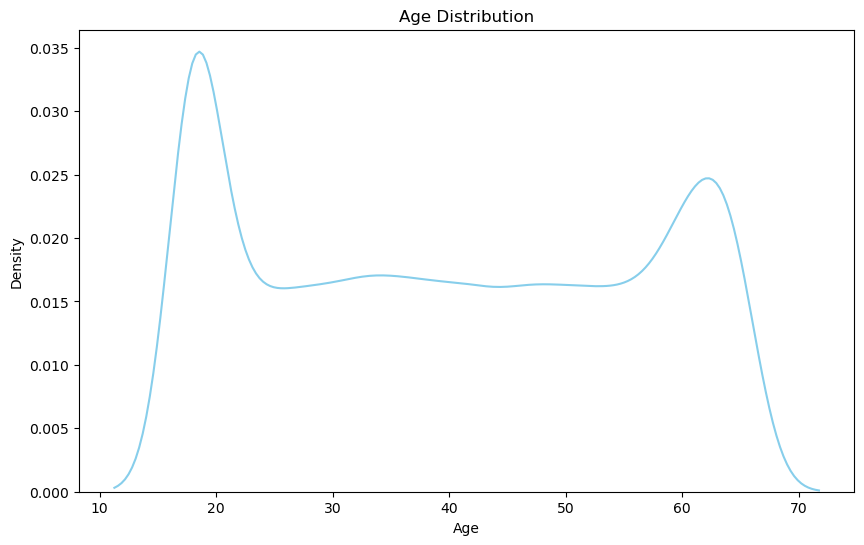

In [100]:
# Plotting KDE plot for age distribution
plt.figure(figsize=(10, 6))
sns.distplot(df["Age"], color='skyblue',hist=False)
plt.title('Age Distribution')

plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


# Analysis of Age Distribution:

##### The age distribution exhibits a peak just below 20 years, followed by a decline until around the age of 25. Afterward, the distribution remains relatively constant until approximately 55 years of age. Subsequently, there is a rise in the distribution between 59 and 62 years of age, followed by a decline until around 70 years of age.


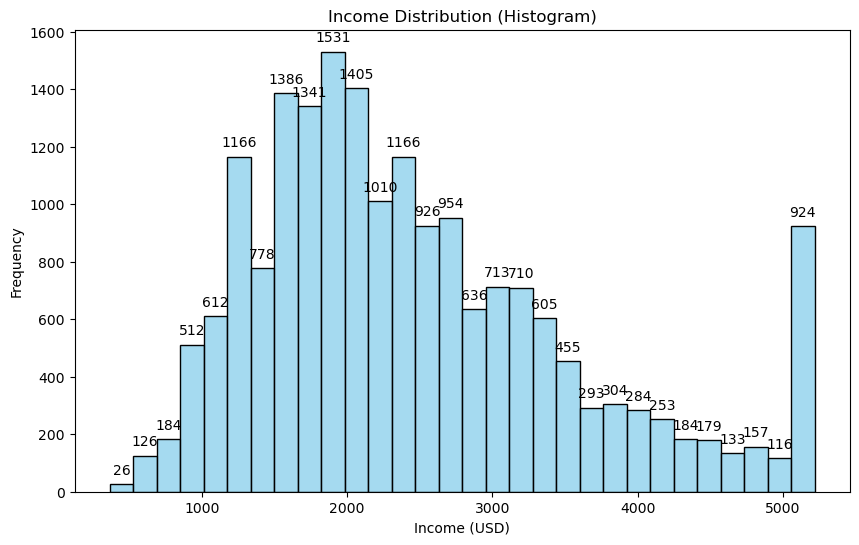

In [101]:
plt.figure(figsize=(10, 6))
ax=sns.histplot(data=df, x='Income (USD)', bins=30, kde=False, color='skyblue', edgecolor='black')
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    ax.annotate(f'{int(y)}', (x, y), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.title('Income Distribution (Histogram)')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.show()

# Income Distribution Analysis:

The income distribution analysis reveals that the highest frequency of individuals (approximately 1531) corresponds to an income of around 2000 USD. Subsequently, the frequency gradually decreases until it reaches a minimum around 116 individuals. There is then a notable increase in frequency to around 924 individuals at an income level of approximately 5000 USD, which could be attributed to the capping of outliers.


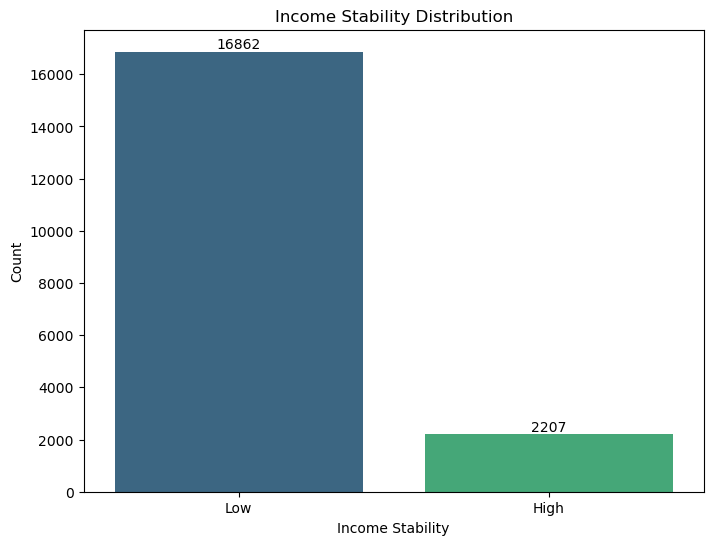

In [102]:
# Plot count plot for Income Stability
plt.figure(figsize=(8, 6))
k=sns.countplot(data=df, x='Income Stability', palette='viridis')
for i in k.containers:
    k.bar_label(i)
plt.title('Income Stability Distribution')
plt.xlabel('Income Stability')
plt.ylabel('Count')
plt.show()

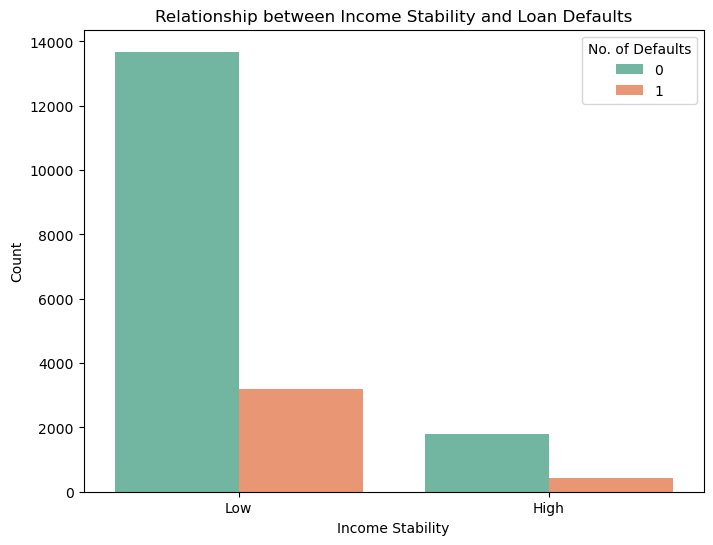

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income Stability', hue='No. of Defaults', palette='Set2')

plt.title('Relationship between Income Stability and Loan Defaults')
plt.xlabel('Income Stability')
plt.ylabel('Count')
plt.legend(title='No. of Defaults')
plt.show()

# Univariate Analysis of Income Stability:

1. Upon analyzing the graph of income stability, it becomes evident that a significant proportion of individuals, approximately 16862, exhibit low income stability.

2. Conversely, a smaller proportion, around 2207 individuals, demonstrate high income stability.


# The 2nd Graph shows the same just divides it by the loan defaults
.
.


Text(0, 0.5, 'Frequency')

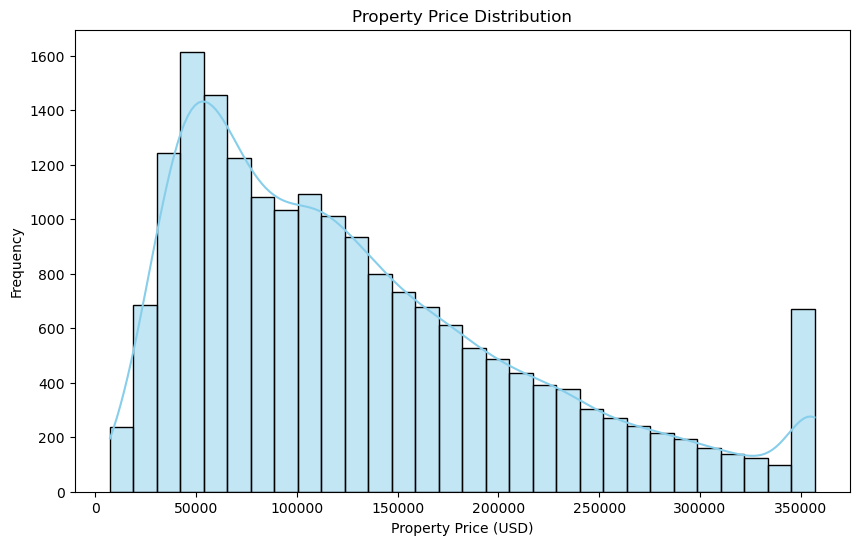

In [103]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Property Price', bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('Property Price Distribution')
plt.xlabel('Property Price (USD)')
plt.ylabel('Frequency')

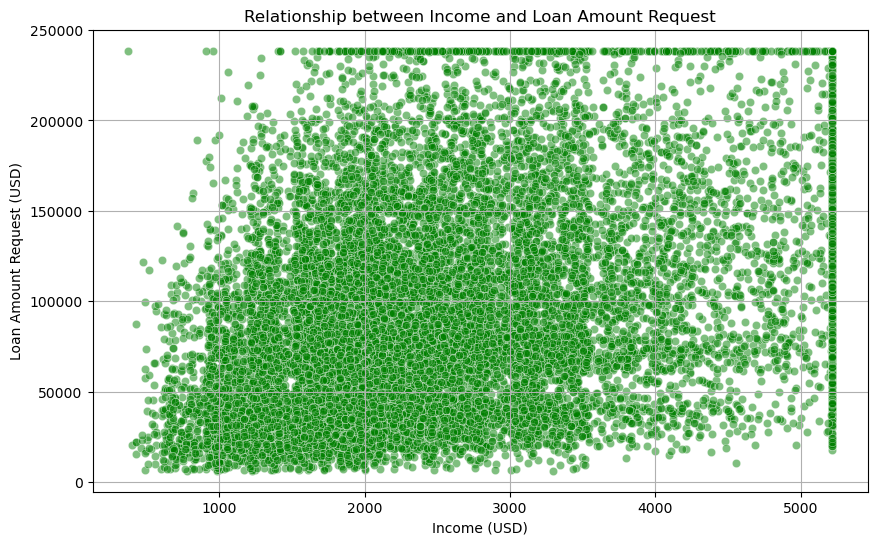

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income (USD)', y='Loan Amount Request (USD)', color='g', alpha=0.5)

plt.title('Relationship between Income and Loan Amount Request')
plt.xlabel('Income (USD)')
plt.ylabel('Loan Amount Request (USD)')
plt.grid(True)
plt.show()

# Relationship between Income and Loan Amount Request:

1. Individuals with incomes below 1k have requested loan amounts approximately up to 55k. 

2. For individuals with incomes between 1k to 2k, there is a dense concentration of loan requests up to 150k.

3. Similarly, for incomes between 2k to 3k, loan requests are concentrated up to 175k.

4. As income increases to the range of 3k to 3.5k, loan requests are densely clustered up to 200k.

5. Beyond this range, where the income is higher, the loan requests are spread more evenly between 0k to 240k. However, the boundaries are denser due to the capping applied to certain individuals.


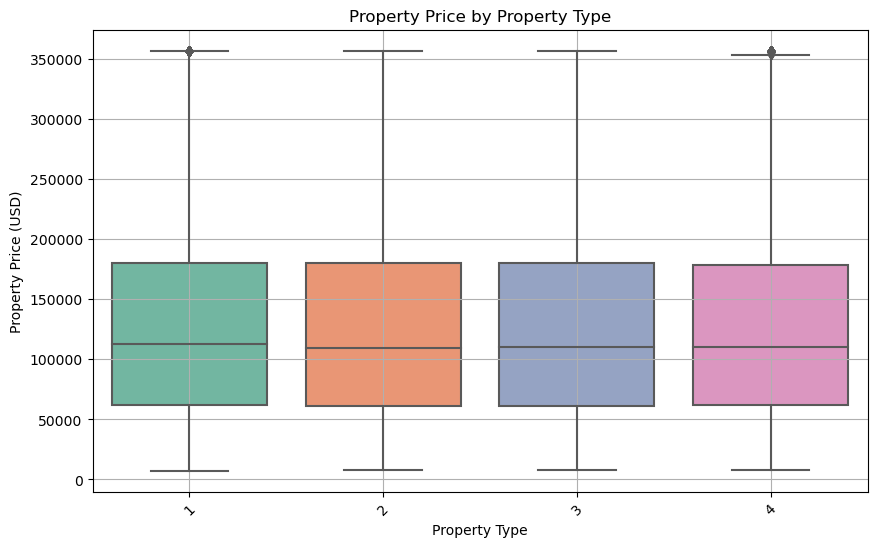

In [106]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property Type', y='Property Price', palette='Set2')

plt.title('Property Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Property Price by Property Type:

1. For Property Type 1, the median property price is approximately 110k to 120k USD, with property prices extending up to approximately 185k USD, which covers about 75% of the properties.

2. For Property Type 2, the median property price is also around 110k to 120k USD, with property prices extending up to approximately 185k USD, covering a significant portion of the properties.

3. Property Type 3 also exhibits a similar trend, with a median property price of approximately 110k to 120k USD and property prices extending up to around 185k USD.

4. Lastly, for Property Type 4, the median property price remains consistent at approximately 110k to 120k USD, with property prices extending up to about 185k USD, covering a substantial proportion of the properties in this category.


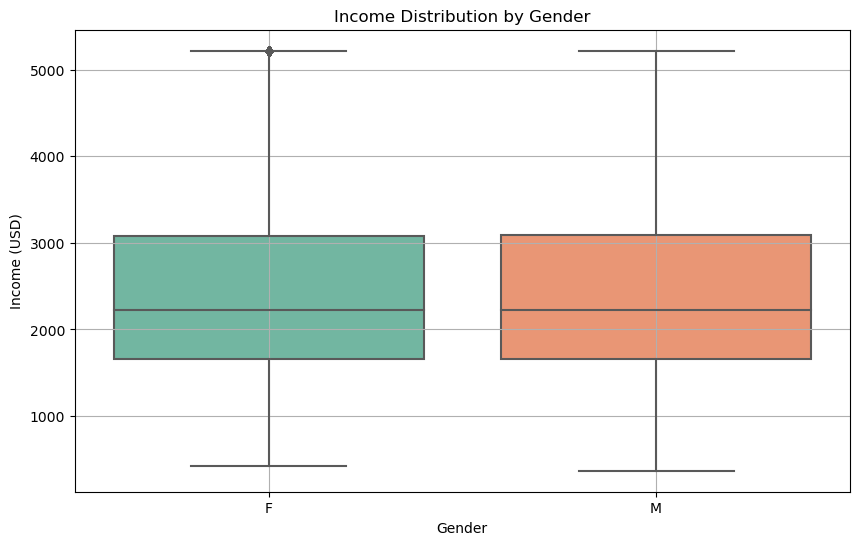

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Income (USD)', palette='Set2')

plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income (USD)')
plt.grid(True)
plt.show()

# Gender Distribution and Income Analysis:

1. The graph indicates an equal distribution of males and females within the dataset.

2. Both males and females exhibit a similar income distribution, with a median income of approximately 2.2k USD.

3. Approximately 75% of both male and female individuals in the dataset have incomes up to 3k USD, indicating a substantial portion of the population earning within this range.
